## Assignment 



###
1.	Build a classification model using logistic regression to predict the correct type of drug based on the given dataset. 
2.	Report the confusion matrix and compute the f-1 score
3.	Find out which variable has the highest impact on target variable

In [1]:
#load neccesary libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm



In [2]:
df=pd.read_csv("drug_df.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
#numerical and categorical column
num_col=df.select_dtypes(include=np.number).columns
cat_col=df.select_dtypes(exclude=np.number).columns


##### inference -  
1) there are no missing values.
2) target varibale is a multiclass(5)


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Exploratory Data Analysis</h2>
</div>

<Axes: >

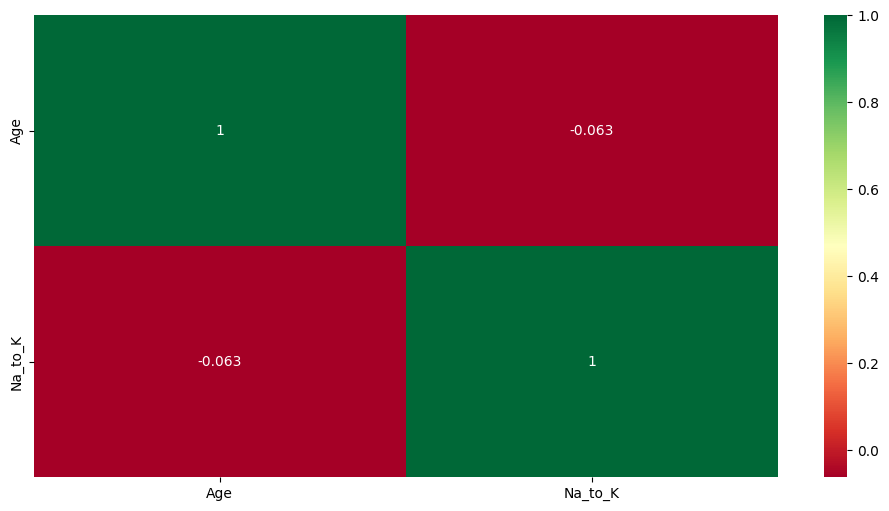

In [6]:
#lets plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

<Axes: xlabel='count', ylabel='Drug'>

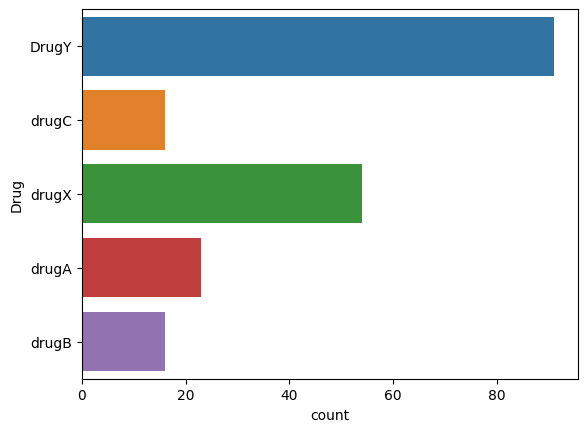

In [7]:
#lets check the y variable distribution to see if it is a unbalanced class

sns.countplot(y=df['Drug'],data=df)

### Inference - it looks, it has many minority class and shows class imbalance 

In [8]:
#lets do chisquare test to understand the relation between x(category variable ) and y(category variable)

#chiSquare (using scipy.stats) 
from IPython.display import display, HTML
from scipy.stats import chi2_contingency

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))



for col in cat_col:
    print(col)
    observed_fre=pd.crosstab(df[col],df['Drug'].astype('category'))
    stat,p,dof,expected_fre=chi2_contingency(observed_fre)
    print(f'chisquare value for {col} is {stat} and p-value is {p}, and dof {dof}')


Sex
chisquare value for Sex is 2.119248418109203 and p-value is 0.7138369773987128, and dof 4
BP
chisquare value for BP is 143.2328718496999 and p-value is 5.0417334144665895e-27, and dof 8
Cholesterol
chisquare value for Cholesterol is 19.609657681313475 and p-value is 0.0005962588389856497, and dof 4
Drug
chisquare value for Drug is 800.0000000000001 and p-value is 6.336427947937658e-160, and dof 16


##### inference - sex column is not statistically significant     

Text(0.5, 1.0, 'relation Sex vs Drug')

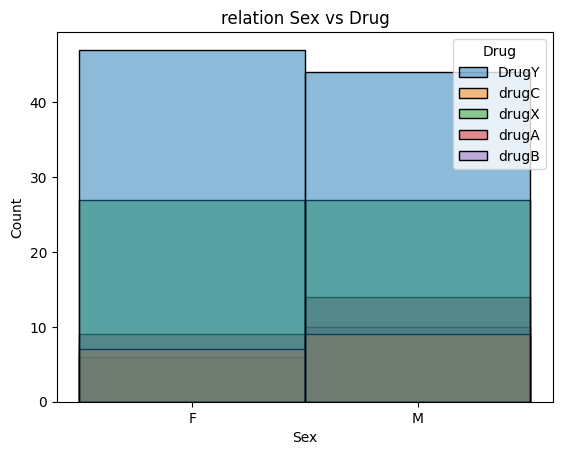

In [9]:
# sex vs Drug
sns.histplot(x=df['Sex'],bins=50,color='white',hue=df['Drug'])
plt.title("relation Sex vs Drug")

##### inference - all types of drugs are used for both sex , we can not conclude drugs prediction  for  sex column

Text(0.5, 1.0, 'relation BP vs Drug')

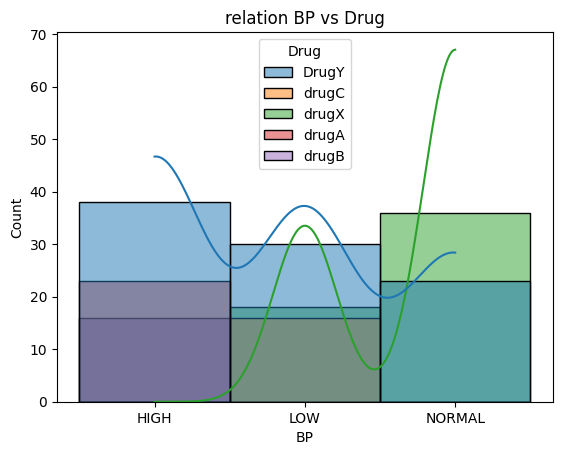

In [10]:
#BP vs Drug
sns.histplot(x=df['BP'],bins=5,color='white',hue=df['Drug'],kde=True)
plt.title("relation BP vs Drug")

##### inference - drug B  is only used for high BP patients and drug X is only for normal BP pateint  

Text(0.5, 1.0, 'relation Cholestrol vs Drug')

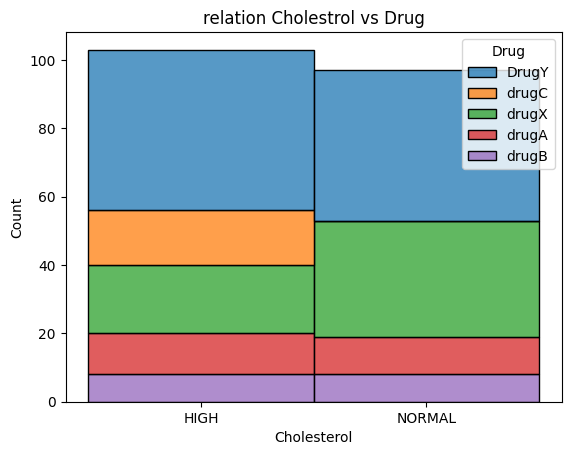

In [11]:
#cholestrol vs Drug
sns.histplot(x=df['Cholesterol'],bins=50,color='white',hue=df['Drug'],binwidth=.2,multiple='stack')
plt.title("relation Cholestrol vs Drug")

##### 

##### inference - drug c is only used for high cholestrol patients 

Text(0.5, 1.0, 'relation Cholestrol vs Drug')

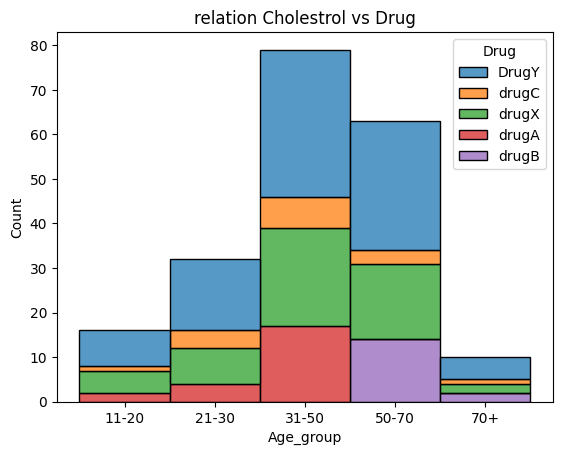

In [12]:
#age vs drug

#lets create a  age group
labels=['0-10','11-20','21-30','31-50','50-70','70+']
bins=[0,10,20,30,50,70,100]
df_age_grp=pd.DataFrame()
df_age_grp=df.copy()
df_age_grp['Age_group']=pd.cut(df_age_grp['Age'],bins=bins,labels=labels)
sns.histplot(x=df_age_grp['Age_group'],bins=100,multiple='stack',hue=df['Drug'])
plt.title("relation Cholestrol vs Drug")


<Axes: xlabel='Age', ylabel='Count'>

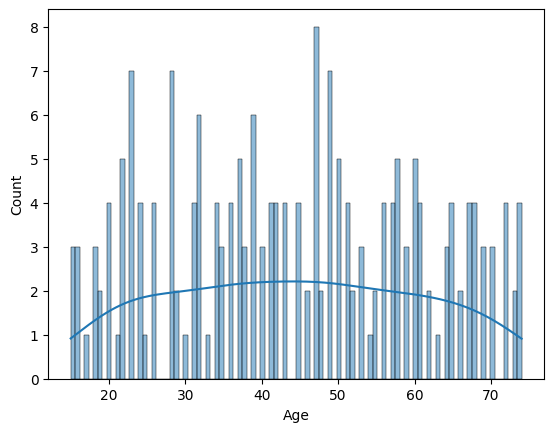

In [13]:
sns.histplot(data=df_age_grp,x='Age',bins=100,kde=True)

##### inference - drugs are not used for kids , drug B is only  used for patients having age above 50 (senior citizens) , drug A is not used for patients having age above 50

In [14]:
df_age_grp.groupby(['Age_group','BP'])['Drug'].value_counts()

Age_group  BP      Drug 
11-20      HIGH    DrugY     8
                   drugA     2
           LOW     drugC     1
                   drugX     1
           NORMAL  drugX     4
21-30      HIGH    DrugY     8
                   drugA     4
           LOW     drugC     4
                   DrugY     2
           NORMAL  drugX     8
                   DrugY     6
31-50      HIGH    drugA    17
                   DrugY    11
           LOW     DrugY    14
                   drugX    12
                   drugC     7
           NORMAL  drugX    10
                   DrugY     8
50-70      HIGH    drugB    14
                   DrugY     9
           LOW     DrugY    12
                   drugC     3
                   drugX     3
           NORMAL  drugX    14
                   DrugY     8
70+        HIGH    DrugY     2
                   drugB     2
           LOW     DrugY     2
                   drugX     2
                   drugC     1
           NORMAL  DrugY     1
Name: Drug, dt

<Axes: xlabel='Drug', ylabel='Age_group'>

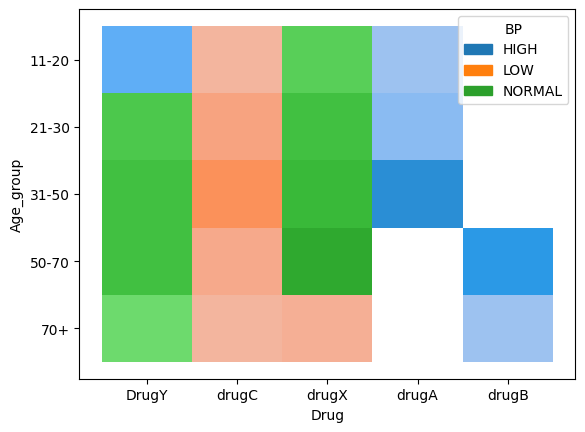

In [15]:
sns.histplot(data=df_age_grp,y='Age_group',x='Drug',hue='BP')

Text(0.5, 1.0, 'relation Na_to_K vs Drug')

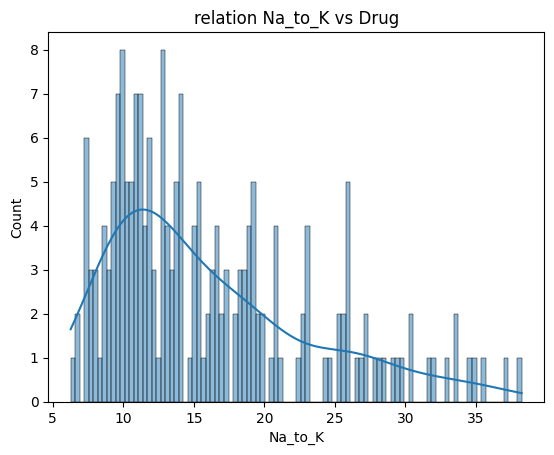

In [16]:
sns.histplot(x=df_age_grp['Na_to_K'],bins=100,kde=True)
plt.title("relation Na_to_K vs Drug")


<Axes: >

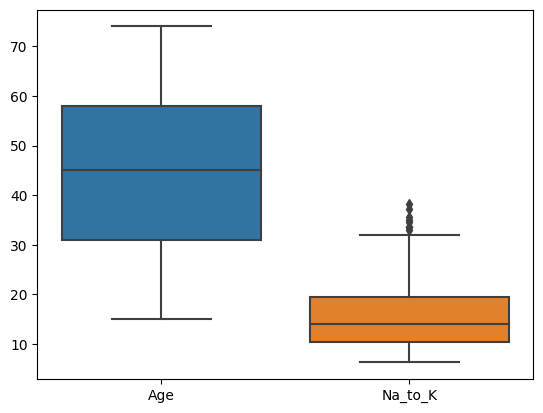

In [17]:
#checking the outliers using box plot

sns.boxplot(data=df_age_grp)

## feature encoding 

In [18]:
df.drop(columns='Sex',inplace=True)

In [19]:
#lets do one hot encoding for all category columns
BP_dummies= pd.get_dummies(data=df,columns=['BP'],prefix='BP')
BP_dummies['Cholesterol']=BP_dummies['Cholesterol'].map({'HIGH':1,"NORMAL":0})

In [20]:
df_encoded= BP_dummies.copy()
df_encoded

,Age,Cholesterol,Na_to_K,Drug,BP_HIGH,BP_LOW,BP_NORMAL
0,23,1,25.355,DrugY,1,0,0
1,47,1,13.093,drugC,0,1,0
2,47,1,10.114,drugC,0,1,0
3,28,1,7.798,drugX,0,0,1
4,61,1,18.043,DrugY,0,1,0
...,...,...,...,...,...,...,...
195,56,1,11.567,drugC,0,1,0
196,16,1,12.006,drugC,0,1,0
197,52,1,9.894,drugX,0,0,1
198,23,0,14.020,drugX,0,0,1


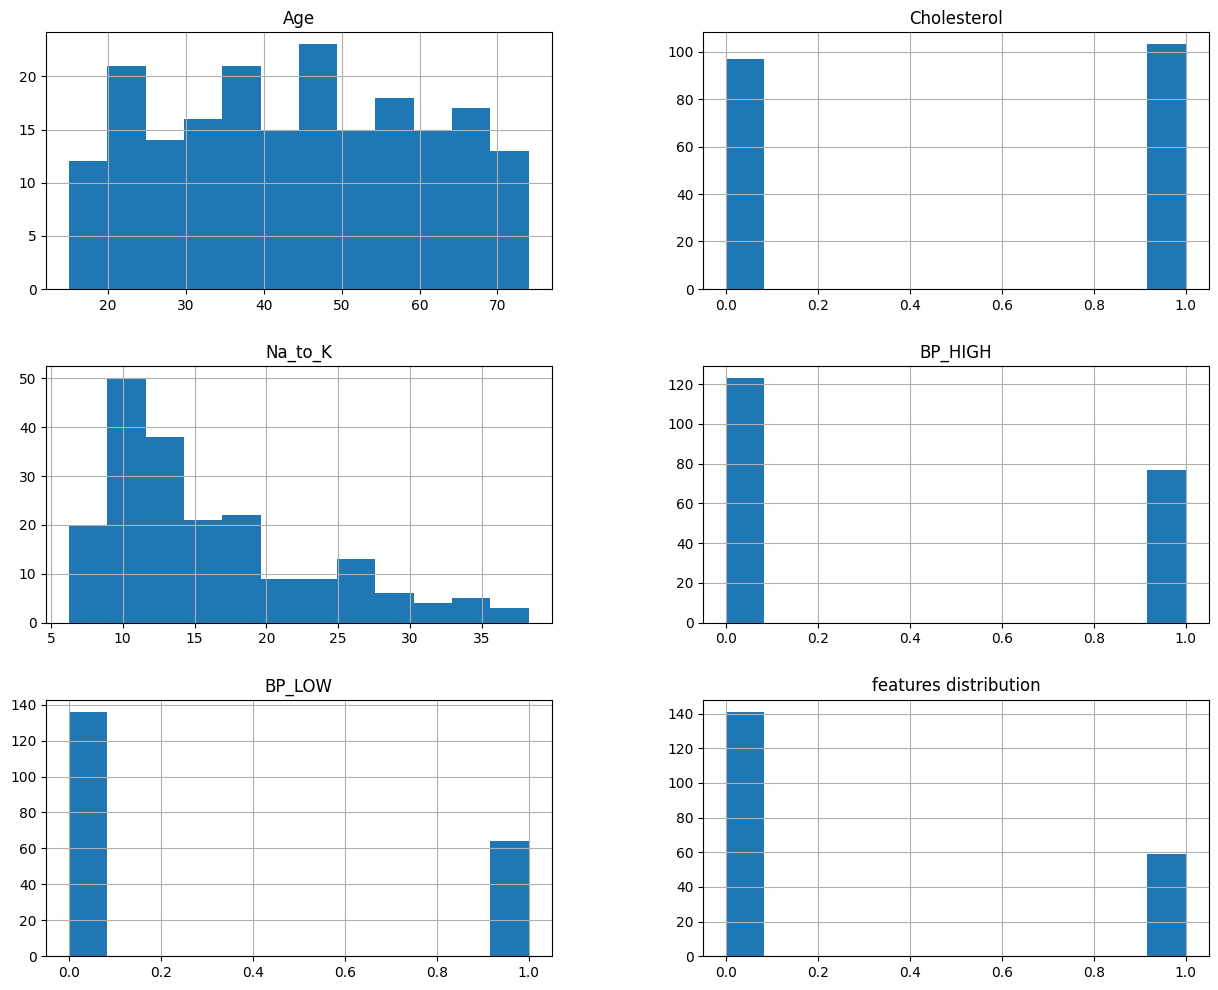

In [21]:
df_encoded.hist(figsize=(15,12),bins=12)
plt.title("features distribution")
plt.show()

In [22]:
X=df_encoded.drop(columns='Drug')
y=df_encoded['Drug']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

In [23]:
model= LogisticRegression(multi_class='multinomial',solver='lbfgs')

In [24]:
#standradizing the values for same scale 


sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


In [25]:
model.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [26]:
model.coef_

array([[ 0.00996371, -0.28124591,  3.9924242 , -0.18517416, -0.081326  ,
         0.28834377],
       [-0.90484888,  0.30626797, -1.39410438,  1.21384386, -0.67774669,
        -0.61379975],
       [ 1.40622249, -0.0845907 , -0.33476507,  1.05755599, -0.70442689,
        -0.41466481],
       [-0.47507312,  1.25268591, -1.13564312, -0.57907877,  1.12564258,
        -0.55288587],
       [-0.03626419, -1.19311726, -1.12791163, -1.50714692,  0.337857  ,
         1.29300666]])

In [27]:
df_coeff=pd.DataFrame({'Feature':X.columns,'COEFF':model.coef_[0]})
df_coeff

,Feature,COEFF
0,Age,0.009964
1,Cholesterol,-0.281246
2,Na_to_K,3.992424
3,BP_HIGH,-0.185174
4,BP_LOW,-0.081326
5,BP_NORMAL,0.288344


In [28]:
#lets check for multicollinearity using perturbation test
w=model.coef_

#introduce noise
epilson=0.0005
X_=X_train+epilson

In [29]:
model_perturb=LogisticRegression(multi_class='multinomial',solver='lbfgs')
model_perturb.fit(X_,y_train)
w_=model_perturb.coef_

In [30]:
small_number=0.0000001
w_=w_+small_number
w=w+small_number

change= (abs((w-w_)/(w))*100)[0]




In [31]:
dict(zip(X.columns,change.round(4)))

{'Age': 0.0218,
 'Cholesterol': 0.0024,
 'Na_to_K': 0.0002,
 'BP_HIGH': 0.0007,
 'BP_LOW': 0.0084,
 'BP_NORMAL': 0.0001}

##### inference-  no multicollinearity exist

## lets predict the test data on model

In [32]:
y_pred0=model.predict(X_test)


In [33]:
#letc check the accuracy of the model

#ACCURACY

score_lr= model.score(X_test,y_test)
print(score_lr)

0.975


In [34]:
y.value_counts().index

Index(['DrugY', 'drugX', 'drugA', 'drugC', 'drugB'], dtype='object')

In [35]:
actual=y_test
predicted=y_pred0
results= confusion_matrix(actual,predicted,labels=y.value_counts().index)
print("Confusion matrix")
print(results)

Confusion matrix
[[19  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  1  0  3]]


##### inference 
1) DRUG Y
TP =  19 ,
TN= (10+4+4+4),
FN= 0,
FP = 0
2) DRUX X
TP= 10,
TN= (19+3+4+4),
FN= 0,
FP= 0

model has predicted correctly

In [36]:
#lets calculate recall(TPR) and precision

from sklearn.metrics import classification_report

print(classification_report(actual,predicted,target_names=y_test.value_counts().index))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        19
       drugX       0.75      1.00      0.86         3
       drugB       1.00      0.75      0.86         4
       drugC       1.00      1.00      1.00         4
       drugA       1.00      1.00      1.00        10

    accuracy                           0.97        40
   macro avg       0.95      0.95      0.94        40
weighted avg       0.98      0.97      0.97        40




## class imbalance using SMOTE
by default SMOTE will oversample all classes to have the same number of classes equal as the class with the most examples

In [177]:
y.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [181]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
X_train

array([[-0.71529099,  0.93933644,  2.57283241, -0.77459667,  1.46193533,
        -0.6644106 ],
       [ 0.25975956, -1.06458129, -0.99509935,  1.29099445, -0.68402479,
        -0.6644106 ],
       [-1.50751956, -1.06458129, -0.9114647 , -0.77459667, -0.68402479,
         1.50509339],
       [ 1.23481011, -1.06458129,  2.34107375,  1.29099445, -0.68402479,
        -0.6644106 ],
       [ 0.1988189 ,  0.93933644, -0.08303546, -0.77459667,  1.46193533,
        -0.6644106 ],
       [ 0.01599692, -1.06458129, -0.80551789, -0.77459667,  1.46193533,
        -0.6644106 ],
       [ 0.80822549, -1.06458129, -0.19776319,  1.29099445, -0.68402479,
        -0.6644106 ],
       [-0.83717231, -1.06458129, -0.53863555,  1.29099445, -0.68402479,
        -0.6644106 ],
       [ 0.62540352, -1.06458129, -1.20224265, -0.77459667, -0.68402479,
         1.50509339],
       [-1.01999429,  0.93933644,  0.58474617, -0.77459667, -0.68402479,
         1.50509339],
       [ 1.53951341,  0.93933644, -0.8297014 ,  1.

In [182]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm,y_sm=smote.fit_resample(X_train,y_train)
y_sm.value_counts()


DrugY    68
drugA    68
drugX    68
drugB    68
drugC    68
Name: Drug, dtype: int64

##### inferene- we have sampled all the minority class except majority class,here majjority class was Drug Y 

In [190]:
#always first split teh data into train_test then stanrdize them using any method and the resample the train data

In [191]:
#model building

lr=LogisticRegression(multi_class='multinomial',solver='lbfgs')

In [192]:
lr.fit(X_sm,y_sm)

LogisticRegression(multi_class='multinomial')

In [193]:
lr.coef_

array([[-0.0207841 , -0.41597575,  4.92116246, -0.2746796 , -0.04731414,
         0.33633103],
       [-1.68811708,  0.2536325 , -1.84472009,  1.56252074, -0.77866589,
        -0.85391703],
       [ 2.33892366, -0.21836106, -0.53598182,  1.35287218, -0.99544067,
        -0.41456868],
       [-0.67324287,  1.73747868, -1.49317764, -0.85245278,  1.60457946,
        -0.72684692],
       [ 0.0432204 , -1.35677436, -1.04728291, -1.78826054,  0.21684123,
         1.6590016 ]])

In [194]:
df_coeff= pd.DataFrame({"columns": X.columns,"coeff": lr.coef_[0]})
df_coeff

,columns,coeff
0,Age,-0.020784
1,Cholesterol,-0.415976
2,Na_to_K,4.921162
3,BP_HIGH,-0.274680
4,BP_LOW,-0.047314
5,BP_NORMAL,0.336331


#### 

#### lets check evaluation metrics

In [195]:
from sklearn.metrics import accuracy_score,roc_auc_score,plot_roc_curve
def compute_evaluation_metric(model,X_test,y_actual,y_pred,y_pred_prob):
    cm=confusion_matrix(y_actual,y_pred,labels=y.value_counts().index)
    print(f"confusion matrix -\n {cm}\n")
    print(f"accuracy score : {accuracy_score(y_actual,y_pred)}")
    print(f"macro averaged OvR AUC score : {roc_auc_score(y_actual,y_pred_prob,multi_class='ovr',average='macro')}")
    #way to find entire multiclass confusion matrix
    TP=(np.diag(cm))
    
    FP=(cm.sum(axis=0)-np.diag(cm))
    #print(FP)
    FN=(cm.sum(axis=1)-np.diag(cm))
    #print(FN)
    #print(f"cm sum -{cm.sum()}")
    TN=cm.sum()-(FP+FN+TP)
    #print(TN)
    
    TPR=np.round(np.mean(TP/(TP+FN)),4)
    FNR=np.round(np.mean(FN/(TP+FN)),4)
    TNR=np.round(np.mean(TN/(TN+FP)),4)
    FPR=np.round(np.mean(FP/(FP+TN)),4)
    print(f"TPR/Recall is {TPR}")
    print(f"TNR/Specifity is {TNR}")
    print(f"FNR is {FNR}")
    print(f"FPR is {FPR}" )
    print(f"\n classification report - :\n {classification_report(y_actual,y_pred)}")
    #plot_roc_curve(model,y_actual,y_pred_prob)
    #plt.show()

In [196]:
y_pred=lr.predict(X_test)
y_pred_prob=lr.predict_proba(X_test)
#y_pred_prob=[x[1] for x in y_pred_prob]

compute_evaluation_metric(lr,X_test,y_test,y_pred,y_pred_prob)


confusion matrix -
 [[18  3  2  0  0]
 [ 0  9  0  0  0]
 [ 0  0  2  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0  3]]

accuracy score : 0.875
macro averaged OvR AUC score : 0.9918694585927185
TPR/Recall is 0.9565
TNR/Specifity is 0.9701
FNR is 0.0435
FPR is 0.0299

 classification report - :
               precision    recall  f1-score   support

       DrugY       1.00      0.78      0.88        23
       drugA       0.50      1.00      0.67         2
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         3
       drugX       0.75      1.00      0.86         9

    accuracy                           0.88        40
   macro avg       0.85      0.96      0.88        40
weighted avg       0.92      0.88      0.88        40



### ROC curves are typically used in binary classification, where the TPR and FPR can be defined unambiguously. In the case of multiclass classification, a notion of TPR or FPR is obtained only after binarizing the output. This can be done in 2 different ways:

the One-vs-Rest scheme compares each class against all the others (assumed as one);

the One-vs-One scheme compares every unique pairwise combination of classes. 

In [197]:
#converting class labels to integers
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer().fit(y_train)
y_encode_test=lb.transform(y_test)

In [198]:
y_encode_test.shape #(n_samples,n_classes)


(40, 5)

In [199]:
# for each classs in multiclass find ROC and Confusionmatrix parameters
for clss in lb.classes_:
    print(f"class - {clss}")
    print(f"TP {clss} - {sum([1 if ((i==clss) & (j==clss)) else 0 for (i,j) in zip(y_test,y_pred)])}")
    print(f"FP {clss} - {sum([1 if ((i!=clss) & (j==clss)) else 0 for (i,j) in zip(y_test,y_pred)])}")
    print(f"TN {clss} - {sum([1 if ((i!=clss) & (j!=clss)) else 0 for (i,j) in zip(y_test,y_pred)])}")
    print(f"FN {clss} - {sum([1 if ((i==clss) & (j!=clss)) else 0 for (i,j) in zip(y_test,y_pred)])}")
    print(f"TPR is {np.mean(TP/(TP+FN))}")
    print(f"TNR is {np.mean(TN/(TN+FP))}")
    print(f"")
    classid=np.flatnonzero(lb.classes_==clss)[0]
    roc=roc_auc_score(
        y_encode_test[:,classid],
        y_pred_prob[:,classid],
        multi_class='ovr',
        average='micro',
    )
    print(f"Mirco-averaged one vs rest ROC AUC score for classid {classid} is {roc}")

class - DrugY
TP DrugY - 18
FP DrugY - 0
TN DrugY - 17
FN DrugY - 5
TPR is 0.9565217391304348
TNR is 0.9701188455008488

Mirco-averaged one vs rest ROC AUC score for classid 0 is 1.0
class - drugA
TP drugA - 2
FP drugA - 2
TN drugA - 36
FN drugA - 0
TPR is 0.9565217391304348
TNR is 0.9701188455008488

Mirco-averaged one vs rest ROC AUC score for classid 1 is 0.9736842105263158
class - drugB
TP drugB - 3
FP drugB - 0
TN drugB - 37
FN drugB - 0
TPR is 0.9565217391304348
TNR is 0.9701188455008488

Mirco-averaged one vs rest ROC AUC score for classid 2 is 1.0
class - drugC
TP drugC - 3
FP drugC - 0
TN drugC - 37
FN drugC - 0
TPR is 0.9565217391304348
TNR is 0.9701188455008488

Mirco-averaged one vs rest ROC AUC score for classid 3 is 1.0
class - drugX
TP drugX - 9
FP drugX - 3
TN drugX - 28
FN drugX - 0
TPR is 0.9565217391304348
TNR is 0.9701188455008488

Mirco-averaged one vs rest ROC AUC score for classid 4 is 0.985663082437276


### TPR,TNR,FNR,FPR for multiclass problem


In [200]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[18,  2,  0,  0,  3],
       [ 0,  2,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  9]], dtype=int64)

In [201]:
TP=np.diag(cm).astype(float)
TP

array([18.,  2.,  3.,  3.,  9.])

In [202]:
FN=cm.sum(axis=1)-np.diag(cm)
FN

array([5, 0, 0, 0, 0], dtype=int64)

In [203]:
FP=cm.sum(axis=0)-np.diag(cm)
FP.sum()

5

In [204]:
TN= cm.sum()-(FP+FN+TP)
TN

array([17., 36., 37., 37., 28.])